<a href="https://colab.research.google.com/github/mpudig/MATH5271/blob/main/MATH5271_Lab_6_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH5271 Lab 6

# Discrimination, Classification and Clustering

Welcome to the 6th MATH5271 lab session. In this lab we will discuss Discrimination, Classification and Clustering. By the end of this lab you should be able to:

- Calculate the Fisher's Linear Discriminant and use it to discriminate between two groups within a data set;
- Use gaussian probablisitic discrimination to discriminate between 3 groups and use this to probablistically classify new data;
- Calculate distances between data points and cluster points according to a heirarchical clustering algorithm.

## Google Colaboratory

We will run the python labs in [Google Colaboratory](colab.research.google.com). Google Colab is a web-based computational environment in which you can read, write, and execute interactive *notebooks* like the one you are reading. The python code runs on a virtual machine in the cloud, so you don't need to install python on your local machine. 

Before you begin the lab, you will need to [sign up](https://accounts.google.com/signup) for a free Google account. If you do not wish to sign up for a Google account, that's fine: you will still be able to read through the lab. You just won't be able to make edits or run any code. 

## Colaboratory and Google Drive

If you have a Google account, you can mount your Google drive within the Colab environment by copying and pasting the code below into a new cell (click "+ Code"). This is not required to run the lab (figures and movies will be saved to the Colab virtual machine and played in your browser). 
```
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/" "/content/"'
```

## 1. Setup and Load Data

Before we get started we need to ensure we have the appropriate 'libraries' are installed. You can think of these as opening a box of available tools. The .csv files we upload will be uploaded into a 'pandas' data frame. We will use the 'numpy' (numerical python) package to do some basic maths with the data and Matplotlib's 'pyplot' package to make some pretty graphs. 


There are many other packages and libraries avaialble freely in python especially for the current topic (e.g. Skitlearn). We will experiment with a few in this course but will only really scratch the surface. I will try to keep things as simple as possible so we can focus on understanding - rather than trouble shooting technical issues.

In [ ]:
# import libraries
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline

The first data set we look at will be example data table 13.1 from Wilks which contains mean temperature and precipiation data for various US cities.

We will load the data table as a pandas 'DataFrame'. This is a 2-dimensional data structure that can store data of different types and has inbuilt operations (like calcualting statistics and doing basic plots).

In [ ]:
)# Define the URL where the data set is stored
dfurl='https://raw.githubusercontent.com/janzika/MATH5271/main/WilksTable13.1.csv'
HM_url ='http://environmentalcomputing.net/wp-content/uploads/2016/05/Harbour_metals.csv' #the data set as a Pandas Dataframe using the 'read_csv' function
df1 = pd.read_csv(dfurl)
dfhm = pd.read_csv(HM_url)
df1

,Station,Temp,Ppt,Group,sym
0,"Athens, GA",79.2,5.18,Southeast US,o
1,"Atlanta, GA",78.6,4.73,Southeast US,o
2,"Augusta, GA",80.6,4.40,Southeast US,o
3,"Gainesville, FL",80.8,6.99,Southeast US,o
4,"Huntsville, AL",79.3,5.05,Southeast US,o
5,"Jacksonville, FL",81.3,6.54,Southeast US,o
6,"Macon, GA",81.4,4.46,Southeast US,o
7,"Montgomery, AL",81.7,4.78,Southeast US,o
8,"Pensacola, FL",82.3,7.18,Southeast US,o
9,"Savannah, GA",81.2,7.37,Southeast US,o


## Discrimination

We have a data set containing mean July temperatures and accumulated rainfall totals for July in various cities in the United States. These have been classified into 3 groups: Southeast; Central and Northeast.

Our aim with discrimination is to develop ascertain what about the variables in the data set distinguish the different groups.

Let's start by just making a scatter plot of the Southeast and Central Goups.

Text(0, 0.5, 'July Mean Precip. [Inches]')

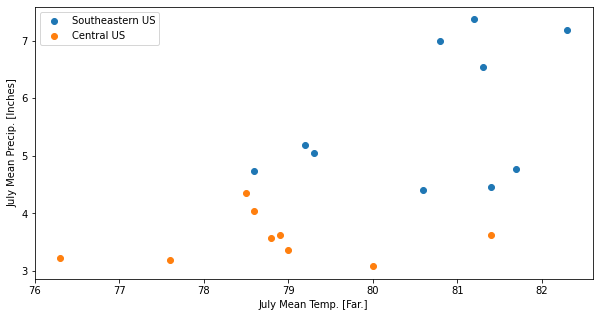

In [ ]:
# Get only the Southeast data
x1 = np.array([df1[df1['sym'].isin(['o'])].Temp, df1[df1['sym'].isin(['o'])].Ppt])
# Only Central
x2 = np.array([df1[df1['sym'].isin(['x'])].Temp, df1[df1['sym'].isin(['x'])].Ppt])
# Only Northeast
x3 = np.array([df1[df1['sym'].isin(['+'])].Temp, df1[df1['sym'].isin(['+'])].Ppt])
# Plot just the Central and Southeast
plt.scatter(x1[0,:],x1[1,:],label = 'Southeastern US')
plt.scatter(x2[0,:],x2[1,:],label = 'Central US')
plt.legend()
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')

### Fisher's Linear Discriminant

In order to derive Fisher's Discriminant we need to know a few things about the data first. Obviously the mean's and centroid of each group but also their covariance matricies ($S_1$,$S_2$,$S_3$). 

We also need to calculate what is called the common covariance matrix 

$$ S_{pool} = \frac{n_1-1}{n_1+n_2-2}S_1 + \frac{n_2-1}{n_1+n_2-2}S_2.$$

In [ ]:
# Mean of the Southeast and Central data
x1mean = np.mean(x1,axis=1)
x2mean = np.mean(x2,axis=1)
x2mean = np.mean(x2,axis=1)
# Covariance of the Southeast and Central data
S1 = np.cov(x1)
S2 = np.cov(x2)
S3 = np.cov(x3)
# Number of locations
n1 = x1.shape[1]
n2 = x3.shape[1]
n3 = x3.shape[1]
#Pooled Covariance (weighted average of two)
Spool = ((n1-1)/(n1+n2-2))*S1 + ((n2-1)/(n1+n2-2))*S2

9

According to Fisher's theory, assuming the covariance matricies are equal for the two groups the maximum difference in means between the two groups (maximimum Mahalanobis distance between the two centroids more precisely) is acheived by discriminating the data in the direction 

$$ {\bf a} = [S_{pool}]^{-1}(\overline{\bf x}_1 - \overline{\bf x}_2). $$

Let's plot the centroids and this 'discriminant vector' $\bf a$ on the original data.

Text(0, 0.5, 'July Mean Precip. [Inches]')

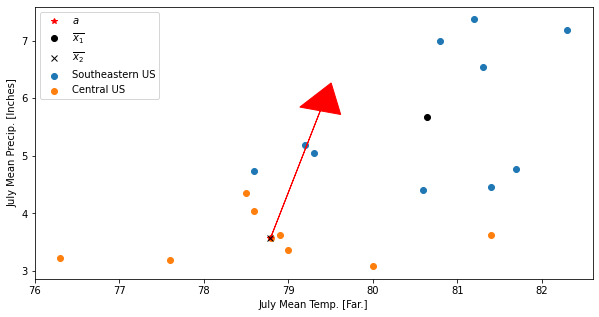

In [ ]:
#Discriminant vector
a = np.matmul(np.linalg.inv(Spool),(x1mean - x2mean))
# Plot
plt.scatter(x1[0,:],x1[1,:],label = 'Southeastern US')
plt.scatter(x2[0,:],x2[1,:],label = 'Central US')
# Plot means
plt.plot(x1mean[0],x1mean[1],'ok',label = '$\overline{x_1}$')
plt.plot(x2mean[0],x2mean[1],'xk',label = '$\overline{x_2}$')
# There is no real reason why I started the a vector at x1mean...
plt.plot(x2mean[0],x2mean[1],'*r',label = '$a$')
plt.arrow(x2mean[0],x2mean[1],a[0],a[1],\
          head_width=0.5,head_length=0.5, fc='r', ec='r')
plt.legend()
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')

Now that we have a direction to do our discrimination with we can now actually compute the 'Fisher's Linear Discriminant' for each data point $\bf x$ such that

$$\delta_1({\bf x}) = {\bf a}^T {\bf x}.$$

Finally, we can set the mid point between the $\delta_1(\overline{\bf x}_1)$ and $\delta_1(\overline{\bf x}_2)$ as our line of discrimination $\hat{m}$. That is

$$ \hat{m} = \frac{1}{2}({\bf a}^T \overline{\bf x}_1-{\bf a}^T \overline{\bf x}_2)$$

Let's looks at how our data is distributed along $\delta_1$ and where $\hat{m}$ sits. 

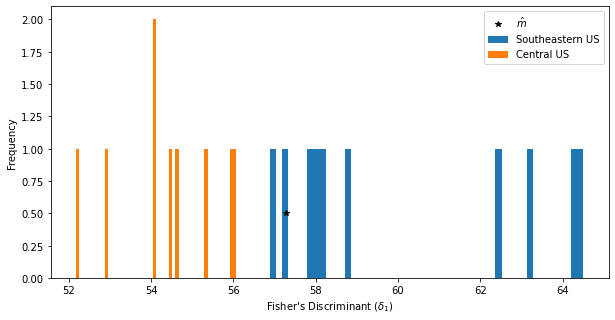

In [ ]:
#Fisher's linear discriminant for the two groups
d1_1 = np.matmul(np.transpose(a),x1)
d1_2 = np.matmul(np.transpose(a),x2)
#midpoint between groups
m = 0.5*(np.matmul(np.transpose(a),x1mean)+np.matmul(np.transpose(a),x2mean))
#Plot histograms (with many bins) and label where m is
plt.hist(d1_1,50,label = 'Southeastern US')
plt.hist(d1_2,50,label = 'Central US')
plt.plot(m,0.5,'*k',label = '$\hat{m}$')
plt.xlabel('Fisher\'s Discriminant ($\delta_1$)')
plt.ylabel('Frequency')
plt.legend()

As you can see this method of discrimination only does so well since 1 point (actually Atlanta) is in the wrong group. In a way this highlights the fact that using only the means and covariances of groups can only take you so far. In any case, a probablisitic approach may be preferential.

### 3. Classification using Probabilistic Distributions

Let us take a slightly different tac now and ask what is the probability that a city with a mean temperature of 74.7$^{\circ}$F and a mean acucmulate rainfall of 33.37 inches belongs to one of our three groups. This is $classification$. 

We could use the same approach as above, calculating lines dividing the 2D space. Instead we will use Multi-variate normal distributions.

Firstly let's plot all 3 group's and see where ${\bf x}_0 =$[74.7$^{\circ}$F, 33.37in.]$^T$ sits.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

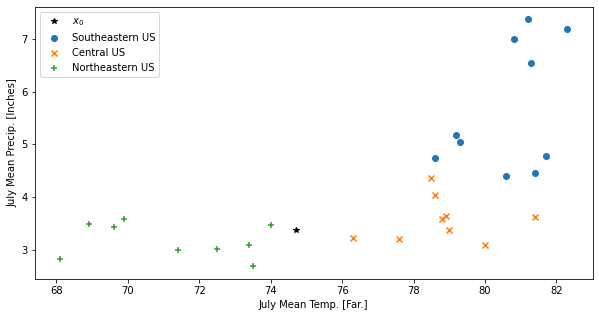

In [ ]:
plt.scatter(x1[0,:],x1[1,:],label = 'Southeastern US')
plt.scatter(x2[0,:],x2[1,:],marker = 'x',label = 'Central US')
plt.scatter(x3[0,:],x3[1,:],marker = '+',label = 'Northeastern US')
plt.plot(74.7,3.37,'*k',label = '$x_0$')
plt.legend()
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')

What we aim to do is model each of the groups as distinct multi-variate goussian distributions. This means the probability distribution function of group $g$ is given by

$$f_g(x) \, \propto \, \frac{1}{\sqrt{\det(S_g)}}\exp\left[-\frac{1}{2}({\bf x_g} - \overline{\bf x_g})^T [S_g]^{-1} ({\bf x_g} - \overline{\bf x_g}) \right].$$ 

Wilk's uses $S_{pool}$ for all three distributions but I am going to use their own covariance matrices $S_g$. Let's define a grid of temperature ans precipitation anomaly values and map what these distributions look like.




(68.0, 83.0, 2.0, 7.5)

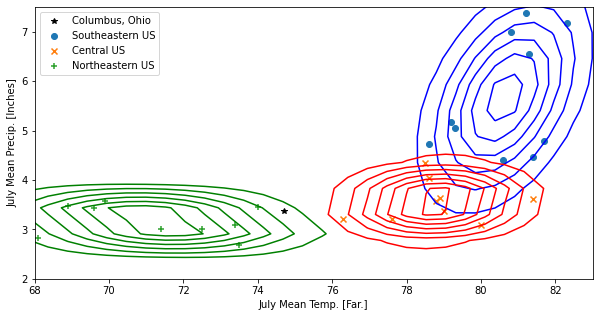

In [ ]:
# Define size of grid in each direction
tn =20
pn =20
# Define range of temp. and precip. anomaly values
T = np.linspace(-5,5,tn)
P = np.linspace(-5,5,pn)
# Create 2D arrays 
Tmesh, Pmesh = np.meshgrid(T, P)
# Pre-allocate 3 PDFs 
f1 = np.zeros_like(Tmesh)
f2 = np.zeros_like(Tmesh)
f3 = np.zeros_like(Tmesh)
# Compute denominator of each PDF 
S1gnormsqinv = np.sqrt(np.linalg.norm(S1))
S2gnormsqinv = np.sqrt(np.linalg.norm(S2))
S3gnormsqinv = np.sqrt(np.linalg.norm(S3))
# Loop through each point in grid
for i in np.arange(0,tn):
  for j in np.arange(0,tn):
    #Compute Sg^{-1}*(xg - xgmean)
    Sx1 = np.matmul(np.linalg.inv(S1),np.array([T[i],P[j]]))
    Sx2 = np.matmul(np.linalg.inv(S2),np.array([T[i],P[j]]))
    Sx3 = np.matmul(np.linalg.inv(S3),np.array([T[i],P[j]]))
    # Compute f
    f1[j,i]= np.exp(-0.5*np.dot(np.array([T[i],P[j]]),Sx1))/S1gnormsqinv
    f2[j,i]= np.exp(-0.5*np.dot(np.array([T[i],P[j]]),Sx2))/S2gnormsqinv
    f3[j,i]= np.exp(-0.5*np.dot(np.array([T[i],P[j]]),Sx3))/S3gnormsqinv

# Shift so centred on mean and contour
plt.contour(T+x1mean[0],P+x1mean[1],f1,colors='b')
plt.contour(T+x2mean[0],P+x2mean[1],f2,colors='r')
plt.contour(T+x3mean[0],P+x3mean[1],f3,colors='g')

plt.scatter(x1[0,:],x1[1,:],label = 'Southeastern US')
plt.scatter(x2[0,:],x2[1,:],marker = 'x',label = 'Central US')
plt.scatter(x3[0,:],x3[1,:],marker = '+',label = 'Northeastern US')
plt.plot(74.7,3.37,'*k',label = 'Columbus, Ohio')

plt.legend()
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')
plt.axis([68,83,2,7.5])

Now we can use Bayes' Theorem to compute the probability that ${\bf x}_0$ is in each group. That for $G$ groups we have 

$$ Pr \{ Group \, g \,|\, {\bf x}_0 \} = \frac{ p_g f_g({\bf x}_0)}{\sum_{h=1}^G p_h f_h({\bf x}_0)}. $$

If we assume the probability of being in each group is the same we can eliminate $p_h$. 

Let's use our MVN models to calculate the probability thet ${\bf x}_0$ is in each group.


In [ ]:
# Define x0 
x0 = np.array([74.7,3.37])
# Calculate fg(x0) (or at least something proportional to it)
f1x0 = np.exp(-0.5*np.dot(np.array(x0-x1mean),\
      np.matmul(np.linalg.inv(S1),np.array(x0-x1mean))))/S1gnormsqinv
f2x0 = np.exp(-0.5*np.dot(np.array(x0-x2mean),\
      np.matmul(np.linalg.inv(S2),np.array(x0-x2mean))))/S2gnormsqinv
f3x0 = np.exp(-0.5*np.dot(np.array(x0-x3mean),\
      np.matmul(np.linalg.inv(S3),np.array(x0-x3mean))))/S3gnormsqinv
# Now apply Bayes' theorem.
Pg1x0 =  f1x0/(f1x0+f2x0+f3x0)
Pg2x0 =  f2x0/(f1x0+f2x0+f3x0)
Pg3x0 =  f3x0/(f1x0+f2x0+f3x0)
print(Pg1x0,Pg2x0,Pg3x0)

4.3874036692393183e-05 0.1185366917839609 0.8814194341793468


So the probability of our location being in the South East group is vanishingly small, about 12% for the Central group and 88% for the North East group.

# Cluster Analysis

Let's take a clean slate and look at the city data again, but now, without any pre-defined groups. Our aim now is to cluster these data point into groups, not according to $a$ $priori$ information such as the region they are from but based on the data itself and a transparent algorithm. This is $Cluster$ $Analysis$.

Text(0, 0.5, 'July Mean Precip. [Inches]')

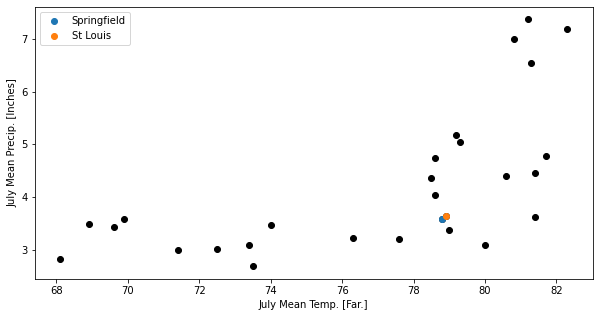

In [ ]:
xraw = np.array([df1.Temp, df1.Ppt])
plt.scatter(xraw[0,:],xraw[1,:],color='k')
plt.scatter(xraw[0,15],xraw[1,15],label = 'Springfield')
plt.scatter(xraw[0,16],xraw[1,16],label = 'St Louis')
plt.legend()
plt.xlabel('July Mean Temp. [Far.]')
plt.ylabel('July Mean Precip. [Inches]')

One's eye and mind are likely tempted to pick up all sorts of features and patterns in these data. But one thing is clear, some data points are closer than others.

I have specifically highlighted Springfield and St Louis. These two are extremely close together. 

But before we jump to any conclusions we should consider what 'close' really means. Firstly we should normalise our data so that each variable has zero mean and a standard deviation of 1.

Text(0, 0.5, 'Normalised Precip.')

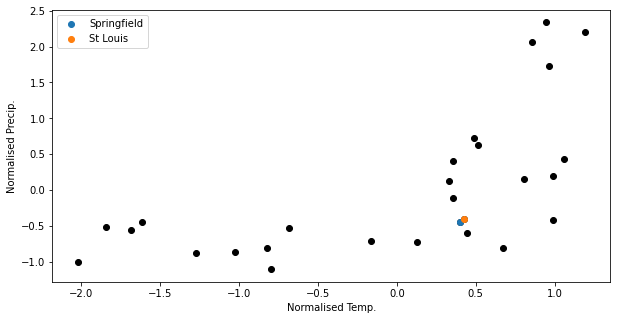

In [ ]:
x = np.array([(df1.Temp-df1.Temp.mean())/df1.Temp.std(), (df1.Ppt-df1.Ppt.mean())/df1.Ppt.std()])
plt.scatter(x[0,:],x[1,:],color='k')
plt.scatter(x[0,15],x[1,15],label = 'Springfield')
plt.scatter(x[0,16],x[1,16],label = 'St Louis')
plt.legend()
plt.xlabel('Normalised Temp.')
plt.ylabel('Normalised Precip.')

Okay it looks the same. Now given this space, let's compute a distance matrix $d_{i,j}$ such that

$$ d_{i,j} = \left[\sum_{k=1}^K(x_{i,k}-x_{j,k})^2\right]^{1/2}$$

where K is the number of dimensions and i and j are the different data points.

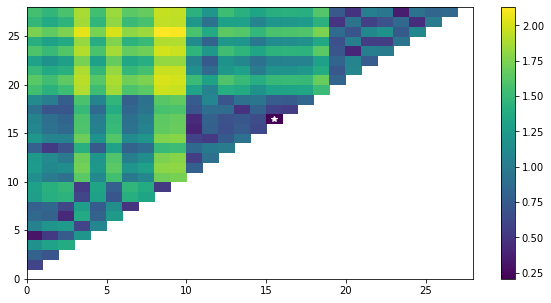

In [ ]:
# Number of data points
N=x.shape[1]
# Pre-allocate matrix
d2 = np.zeros([N,N])+np.nan
# Loop through each pair neglecting one side of the diagonal
for i in np.arange(N):
    for j in np.arange(i):
       d2[i,j] = np.linalg.norm(x[:,i]-x[:,j])
# Find the index of the closest pair     
close_ind = np.where(d2 == np.nanmin(d2))
plt.pcolor(np.sqrt(d2))
plt.plot(close_ind[1]+0.5,close_ind[0]+0.5,'*w')
plt.colorbar()

Here a distance of 1 means the data points are 1 standard deviation apart. 

We have also shown the smallest distance (St Louis and Springfield) and the graph.

Now let's do heirarchical clustering. We aglomerate the closest two. Then define those as a new data point and look for the next nearest. And so on. Here is an algorithm using the 'Centroid' Method. I.e. where groups are linked accroding to the smallest distance between centroids

$$ d_{G_1,G_2} = || \overline{\bf x}_{G_1} - \overline{\bf x}_{G_2} ||.$$

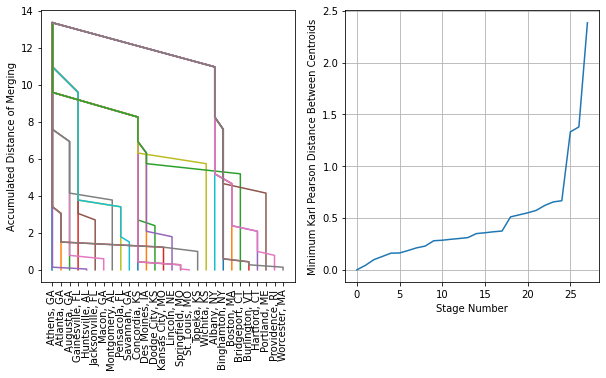

In [ ]:
whichgroup = np.tile(np.arange(0,N),(N,1))
d2 = np.zeros([N,N])+np.nan
diststep = np.zeros([N,1])

for k in np.arange(1,N):
  d2 = np.zeros([N,N])+np.nan
  for i in np.unique(whichgroup[k-1,:]):     
      for j in np.unique(whichgroup[k-1,whichgroup[k-1,:]<(i)]):
          igroup = np.mean(x[:,whichgroup[k,:]==i],axis = 1)
          jgroup = np.mean(x[:,whichgroup[k,:]==j],axis = 1)
          d2[i,j] = np.linalg.norm(igroup-jgroup)
  diststep[k]=np.nanmin(d2)
  close_ind = np.where(d2 == diststep[k])     
  whichgroup[k,:]=whichgroup[k-1,:]
  whichgroup[k,whichgroup[k-1,:]==close_ind[0]]=whichgroup[k-1,close_ind[1]]

plt.rcParams['figure.figsize'] = [10, 5]

plt.subplot(1,2,1)
plt.plot(whichgroup,np.cumsum(diststep))
plt.xticks(np.arange(0,N),df1.Station,rotation=90)
plt.ylabel('Accumulated Distance of Merging')

plt.subplot(1,2,2)
plt.plot(diststep)
plt.ylabel('Minimum Karl Pearson Distance Between Centroids')
plt.xlabel('Stage Number')
plt.grid()


As you can see we can plot a kind of 'Dendrogram' (need a propoer code to do something better).

Below we can choose a stage in the algorithm and see what clusters have emerged.

Text(0.5, 0, 'Stage Number')

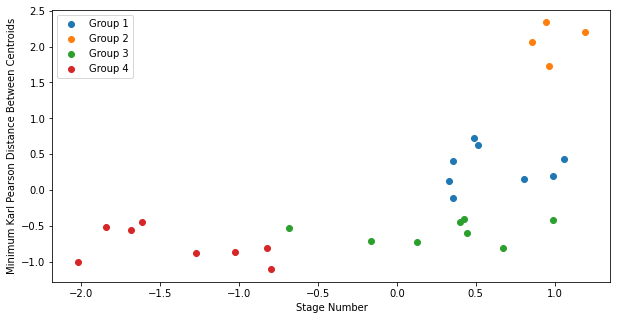

In [ ]:
stage = 24
count=1
for i in np.unique(whichgroup[stage,:]):
  plt.scatter(x[0,whichgroup[stage,:]==i],x[1,whichgroup[stage,:]==i],\
              label='Group '+np.str(count))
  count=count+1
plt.legend()
plt.ylabel('Minimum Karl Pearson Distance Between Centroids')
plt.xlabel('Stage Number')

## 5. Excercises

Here is a data set used in http://www.sciencedirect.com/science/article/pii/S026974910800033X

Let's explore it and see if we can do some interesting clasification and clustering with it!

In [ ]:
HM_url ='http://environmentalcomputing.net/wp-content/uploads/2016/05/Harbour_metals.csv' #the data set as a Pandas Dataframe using the 'read_csv' function
dfhm = pd.read_csv(HM_url)
dfhm

,Location,Species,Rep,Cd,Cr,Cu,Mn,Ni,Pb,Zn
0,Balls Head,Padina,P.13,0.67,3.82,68.92,106.94,1.52,32.62,96.52
1,Balls Head,Padina,P.14,0.50,5.84,93.50,81.98,2.74,28.77,134.64
2,Balls Head,Padina,P.15,0.66,9.04,116.02,124.26,3.17,62.13,150.57
3,Balls Head,Padina,P.16,0.89,4.93,110.55,155.92,2.43,52.46,113.51
4,Balls Head,Padina,P.17,0.86,4.35,117.36,160.90,1.62,47.75,126.34
5,Balls Head,Padina,P.18,0.78,8.68,109.80,166.70,4.16,71.59,130.13
6,Balls Head,Sargassum,S.13,0.54,4.60,23.14,15.20,1.60,142.26,142.26
7,Balls Head,Sargassum,S.14,2.34,8.96,59.15,109.05,1.67,220.29,220.29
8,Balls Head,Sargassum,S.15,2.24,6.81,63.57,85.52,2.50,197.29,197.29
9,Balls Head,Sargassum,S.16,1.56,9.10,48.56,67.08,1.93,153.52,153.52


Text(0, 0.5, '$x_2$')

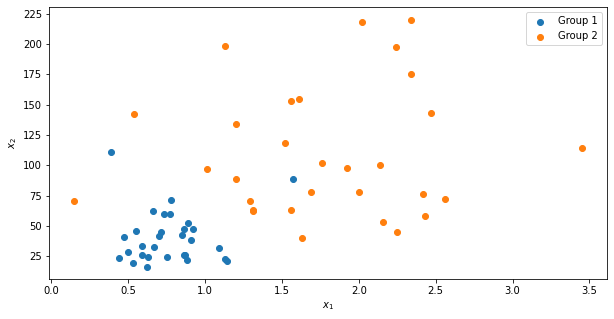

In [ ]:
# Example comparing 2 metals and two species.
plt.scatter(dfhm[dfhm['Species'].isin(['Padina'])].Cd,dfhm[dfhm['Species'].isin(['Padina'])].Pb,label = 'Group 1')
plt.scatter(dfhm[dfhm['Species'].isin(['Sargassum'])].Cd,dfhm[dfhm['Species'].isin(['Sargassum'])].Pb,label = 'Group 2')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


In [ ]:
#Here is the raw 'distance' between the points.
mets= dfhm.iloc[:,3:10]
n=mets.shape[0]
metclust = np.zeros([n,n])
d = np.zeros([n,n])+np.nan
for j in np.arange(n):
    for k in np.arange(j):
      d[j,k] = np.sum((mets.iloc[j,:]-mets.iloc[k,:])**2)
plt.pcolor(d)

